## Problem Statement:

## import libraries

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

## Data Gathering

In [29]:
df= pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
pd.options.display.max_columns = None # it will show all columns

## EDA

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [32]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [34]:
df.shape

(284807, 31)

In [35]:
print("Number of rows are >>",df.shape[0])
print("Number of columns are>>",df.shape[1])

Number of rows are >> 284807
Number of columns are>> 31


## Data engineering

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()
df["Amount"]=sc.fit_transform(pd.DataFrame(df["Amount"]))

In [38]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [39]:
df=df.drop("Time",axis=1)

In [40]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [41]:
# lets check our dataset contain duplicate values
df.duplicated().any()

True

In [42]:
df=df.drop_duplicates()

In [43]:
df.duplicated().any()

False

In [44]:
df.shape

(275663, 30)

In [45]:
# lets check whether our data is balanced or not

In [46]:
df["Class"].value_counts()

0    275190
1       473
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

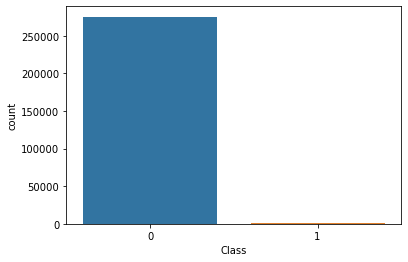

In [47]:
sns.countplot(df["Class"])

### Training and testing of data

In [48]:
x=df.drop("Class",axis=1)
y=df["Class"]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y)

### Handling imbalanced data

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
smt = SMOTE(k_neighbors=5,random_state=45)
x_sampled,y_sampled=smt.fit_resample(x,y)
y_sampled.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [55]:
y_sampled.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [56]:
x_sampled.value_counts()

V1          V2          V3         V4          V5          V6          V7          V8         V9         V10        V11        V12        V13        V14         V15        V16        V17        V18        V19        V20         V21        V22        V23        V24        V25        V26        V27        V28         Amount   
-56.407510  -72.715728  -6.605265   16.491217   34.801666  -26.160506  -19.399981  -1.501300   6.967698   9.537780   3.089395   1.776452   3.732744  -2.530792    5.784514   3.903988  -1.929314   0.206699   2.805883  -12.360962  -6.266878  -1.272167   7.893082   0.767805   5.376595   0.163672  -8.358317   33.847808   4.451791    1
 0.210065    3.673594   -5.939243   6.069659    1.357794   -2.333811   -1.008120    0.426847  -3.778337  -4.638134   5.195455  -5.874979  -2.496669  -10.541567   0.043704  -0.876309   0.328050   0.911202  -1.566508   0.347403    0.378945  -0.348357  -0.451519  -0.497239   1.047773   0.547369   0.555570   0.377787   -0.350447    1
 0.210190

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.20,random_state=45)

## Model evaluation

### 1) logistic regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score,confusion_matrix

In [61]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [62]:
# Training
y_pred_train = log_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)
print("*"*20)
accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
print("*"*20)
clf_report = classification_report(y_train,y_pred_train)
print("classificatio report\n",clf_report)

confusion matrix
 [[214713   5556]
 [ 18579 201456]]
********************
accuracy 0.9451855990406628
********************
classificatio report
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    220269
           1       0.97      0.92      0.94    220035

    accuracy                           0.95    440304
   macro avg       0.95      0.95      0.95    440304
weighted avg       0.95      0.95      0.95    440304



In [63]:
# Testing
y_pred = log_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cnf_matrix)
print("*"*20)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy",accuracy)
print("*"*20)
clf_report = classification_report(y_test,y_pred)
print("classificatio report\n",clf_report)

confusion matrix
 [[53463  1458]
 [ 4685 50470]]
********************
accuracy 0.9441931029470547
********************
classificatio report
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     54921
           1       0.97      0.92      0.94     55155

    accuracy                           0.94    110076
   macro avg       0.95      0.94      0.94    110076
weighted avg       0.95      0.94      0.94    110076



### Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

### Model Selection

In [65]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

## Model Evaluation

In [66]:
# training
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

Accuracy = accuracy_score(y_train,y_pred_train)
print("ACCURACY",Accuracy*100)

cls_report = classification_report(y_train,y_pred_train)
print("CLASSIFICATION REPORT\n",cls_report)

Confusion Matrix
 [[220269      0]
 [     0 220035]]
ACCURACY 100.0
CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    220269
           1       1.00      1.00      1.00    220035

    accuracy                           1.00    440304
   macro avg       1.00      1.00      1.00    440304
weighted avg       1.00      1.00      1.00    440304



In [67]:
# testing
y_pred_test = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix\n",cnf_matrix)

Accuracy = accuracy_score(y_test,y_pred_test)
print("ACCURACY",Accuracy*100)

clf_report = classification_report(y_test,y_pred_test)
print("CLASSIFICATION REPORT\n",clf_report)

Confusion Matrix
 [[54775   146]
 [   47 55108]]
ACCURACY 99.8246665939896
CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     54921
           1       1.00      1.00      1.00     55155

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



### Hyper parameter Tuning

In [68]:
dt_model = DecisionTreeClassifier()
hyper_para = {"criterion" :['gini',"entropy"],
"max_depth":np.arange(2,8),
"min_samples_split":np.arange(3,20),
"min_samples_leaf":np.arange(3,15),
}
rscv_dt_clf = RandomizedSearchCV(dt_model,hyper_para,cv=5)
rscv_dt_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [71]:
dt_tuning=rscv_dt_clf.best_estimator_

In [72]:
dt_tuning

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=10)

In [75]:
dt_clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=10)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=10)

In [76]:
#training
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix\n",cnf_matrix)

Accuaracy = accuracy_score(y_train,y_pred_train)
print("Accuracy",Accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report\n",clf_report)

Confusion matrix
 [[215460   4809]
 [  7659 212376]]
Accuracy 0.9982466659398961
Classification report
               precision    recall  f1-score   support

           0       0.97      0.98      0.97    220269
           1       0.98      0.97      0.97    220035

    accuracy                           0.97    440304
   macro avg       0.97      0.97      0.97    440304
weighted avg       0.97      0.97      0.97    440304



In [77]:
#testing
y_pred_test = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion matrix\n",cnf_matrix)

Accuaracy = accuracy_score(y_test,y_pred_test)
print("Accuracy",Accuracy)

clf_report = classification_report(y_test,y_pred_test)
print("Classification report\n",clf_report)

Confusion matrix
 [[53678  1243]
 [ 1954 53201]]
Accuracy 0.9982466659398961
Classification report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     54921
           1       0.98      0.96      0.97     55155

    accuracy                           0.97    110076
   macro avg       0.97      0.97      0.97    110076
weighted avg       0.97      0.97      0.97    110076



### Random Forest classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

### Model training

In [79]:
rf_clf= RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
#Training
y_pred_train = rf_clf.predict(x_train)

cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy*100)

clf_report = classification_report(y_train,y_pred_train)
print("clf_report\n",clf_report)

confusion metrics
 [[220269      0]
 [     0 220035]]
accuracy 100.0
clf_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    220269
           1       1.00      1.00      1.00    220035

    accuracy                           1.00    440304
   macro avg       1.00      1.00      1.00    440304
weighted avg       1.00      1.00      1.00    440304



In [81]:
#Testing
y_pred_test = rf_clf.predict(x_test)

cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy*100)

clf_report = classification_report(y_test,y_pred_test)
print("clf_report\n",clf_report)

confusion metrics
 [[54901    20]
 [    0 55155]]
accuracy 99.98183073512845
clf_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     54921
           1       1.00      1.00      1.00     55155

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



### HyperParamter Tuning

In [82]:
hyperparamter = {"n_estimators":np.arange(10,20),
"criterion":["gini","entropy"],
"max_depth" :np.arange(4,10),
"min_samples_split":np.arange(3,10),
"min_samples_leaf":np.arange(3,10),
"max_features":["sqrt", "log2"],
"random_state":[41,42,43,44,45],
"oob_score":[True]}
rdscv = RandomizedSearchCV(rf_clf,hyperparamter,cv=4)
rdscv.fit(x_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([4, 5, 6, 7, 8, 9]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'oob_score': [True],
                                        'random_state': [41, 42, 43, 44, 45]})

In [83]:
r_tuning=rdscv.best_estimator_

In [84]:
r_tuning

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_leaf=6, min_samples_split=4, n_estimators=19,
                       oob_score=True, random_state=44)

In [85]:
rf_clf= RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_leaf=6, min_samples_split=4, n_estimators=19,
                       oob_score=True, random_state=44)

In [86]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_leaf=6, min_samples_split=4, n_estimators=19,
                       oob_score=True, random_state=44)

In [87]:
# training
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusioin Matrix\n",cnf_matrix)

Accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy",Accuracy*100)

clf_report=classification_report(y_train,y_pred_train)
print("Classification report\n",clf_report)

Confusioin Matrix
 [[219861    408]
 [  8044 211991]]
Accuracy 98.08041716632145
Classification report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    220269
           1       1.00      0.96      0.98    220035

    accuracy                           0.98    440304
   macro avg       0.98      0.98      0.98    440304
weighted avg       0.98      0.98      0.98    440304



In [88]:
# testing
y_pred_test = rf_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix\n",cnf_matrix)

Accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy",Accuracy*100)

clf_report=classification_report(y_test,y_pred_test)
print("Classification report\n",clf_report)

Confusion Matrix
 [[54781   140]
 [ 2036 53119]]
Accuracy 98.02318398197609
Classification report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     54921
           1       1.00      0.96      0.98     55155

    accuracy                           0.98    110076
   macro avg       0.98      0.98      0.98    110076
weighted avg       0.98      0.98      0.98    110076



### SVM

In [89]:
from sklearn.svm import SVC

In [90]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

### Evaluation

In [91]:
#Training Data
y_pred_train = svc_model.predict(x_train)

cnf_metrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_metrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuarcy",accuracy*100)

clf_report = classification_report(y_train,y_pred_train)
print("classification report",clf_report)

confusion matrix
 [[216609   3660]
 [  4927 215108]]
accuarcy 98.04975653185072
classification report               precision    recall  f1-score   support

           0       0.98      0.98      0.98    220269
           1       0.98      0.98      0.98    220035

    accuracy                           0.98    440304
   macro avg       0.98      0.98      0.98    440304
weighted avg       0.98      0.98      0.98    440304



In [92]:
#Testing Data
y_pred = svc_model.predict(x_test)

cnf_metrix = confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cnf_metrix)

accuracy = accuracy_score(y_test,y_pred)
print("accuarcy",accuracy*100)

clf_report = classification_report(y_test,y_pred)
print("classification report",clf_report)

confusion matrix
 [[53958   963]
 [ 1268 53887]]
accuarcy 97.97321850357935
classification report               precision    recall  f1-score   support

           0       0.98      0.98      0.98     54921
           1       0.98      0.98      0.98     55155

    accuracy                           0.98    110076
   macro avg       0.98      0.98      0.98    110076
weighted avg       0.98      0.98      0.98    110076



### Adaboost classifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(x_train,y_train)

AdaBoostClassifier()

In [95]:
#training
y_pred_train = ada_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report\n",clf_report)

Accuracy = accuracy_score(y_train,y_pred_train)
print("ACCURACY",Accuracy*100)

Confusion Matrix
 [[215064   5205]
 [ 11295 208740]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.98      0.96    220269
           1       0.98      0.95      0.96    220035

    accuracy                           0.96    440304
   macro avg       0.96      0.96      0.96    440304
weighted avg       0.96      0.96      0.96    440304

ACCURACY 96.2525891202442


In [96]:
# testing
y_pred_test =ada_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred_test)
print("Classification Report\n",clf_report)

Accuracy = accuracy_score(y_test,y_pred_test)
print("ACCURACY",Accuracy*100)

Confusion Matrix
 [[53555  1366]
 [ 2884 52271]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     54921
           1       0.97      0.95      0.96     55155

    accuracy                           0.96    110076
   macro avg       0.96      0.96      0.96    110076
weighted avg       0.96      0.96      0.96    110076

ACCURACY 96.13903121479704


### Lets see the accuracy we've got by the models

In [98]:
ACCURACY_df = pd.DataFrame({"MODEL":["Logostic Regression","Decision tree","Decision tree with Hyperparameter",
                            "Random Forest","Random Forest with Hyperparameter","SVM",
                            "Adaboost classifier"],
                   "Training Accuracy":[94.51,100.0,99.82,100.0,98.08,98.04,96.25],
                   "Testing Accuracy":[94.41,99.82,99.82,99.98,98.02,97.97,96.13],
                   })
ACCURACY_df

,MODEL,Training Accuracy,Testing Accuracy
0,Logostic Regression,94.51,94.41
1,Decision tree,100.00,99.82
2,Decision tree with Hyperparameter,99.82,99.82
3,Random Forest,100.00,99.98
4,Random Forest with Hyperparameter,98.08,98.02
5,SVM,98.04,97.97
6,Adaboost classifier,96.25,96.13


<AxesSubplot:xlabel='MODEL', ylabel='Testing Accuracy'>

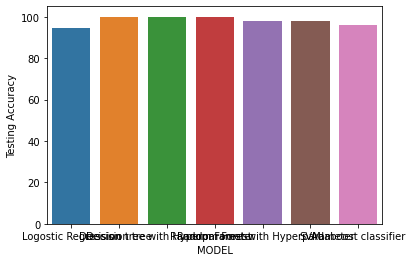

In [108]:
# lets see thye graphical representation of our models accuracy

sns.barplot(ACCURACY_df["MODEL"],ACCURACY_df["Testing Accuracy"],capsize=50,linewidth=30)